In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_gene = pd.read_csv('./processed_data/clean_data/gene_expression.csv', index_col = 0)

In [3]:
df_meta = pd.read_csv('./processed_data/clean_data/metadata.csv', index_col = 0)

In [4]:
data_obj = sc.AnnData(df_gene, obs = df_meta, var = pd.DataFrame([], index = df_gene.columns))

In [5]:
df_qc = sc.pp.calculate_qc_metrics(data_obj)

In [6]:
np.median(df_qc[0].n_genes_by_counts)

2817.0

In [7]:
id2color = ['tab:blue'] * 4 + ['tab:red'] * 5
#id2color = ['silver'] * 9
id2display_id = ['Ctrl %d' %i for i in range(1, 5)] + ['Case %d' %i for i in range(1, 6)]

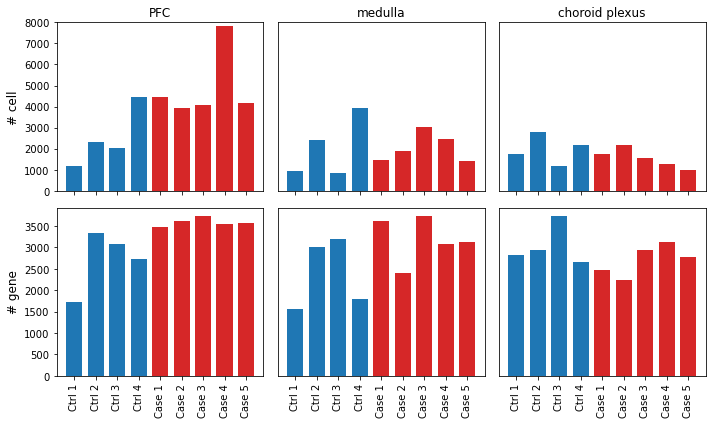

In [8]:
fig, axes = plt.subplots(2, 3, figsize = (10, 6), sharex = True)
id2subject = sorted(set(df_meta.subject_id))

for i, t in enumerate(set(df_meta.tissue)):
    meta = df_meta[df_meta.tissue == t]
    qc = df_qc[0][df_meta.tissue == t]
      
    y_cell = meta.groupby('subject_id').count().loc[id2subject].values[:, 0]
    y_gene = qc.groupby(by = meta.subject_id).median().loc[id2subject].values[:, 0]
    plt.xticks(range(len(id2subject)), id2display_id, rotation = 90)
    plt.sca(axes[0, i])
    plt.bar(range(len(y_cell)), y_cell, 0.75, color = id2color)
    if i == 0:        
        plt.ylabel('# cell', fontsize = 12)
    
    if t == 'choroidplexus':
        plt.title('choroid plexus')
    else:
        plt.title(t)
    
    if i <= 2:
        plt.ylim([0, 8000])   
    if i != 0:
        plt.yticks([])
    
    plt.sca(axes[1, i])
    plt.bar(range(len(y_cell)), y_gene, 0.75, color = id2color)
    
    if i == 0:   
        plt.ylabel('# gene', fontsize = 12)
        
    if i > 2:
        plt.ylim([0, 4000])
    if i != 0:
        plt.yticks([])
        
plt.tight_layout()
plt.savefig('figs/qc_gene_cell_count.pdf')
plt.savefig('figs/png/qc_gene_cell_count.png', dpi=600)
plt.show()

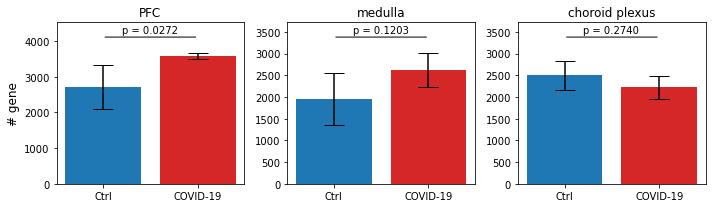

In [11]:
from scipy.stats import ttest_ind

fig, axes = plt.subplots(1, 3, figsize = (10, 3), sharex = True)
#id2subject = sorted(set(df_meta.subject_id))

for i, t in enumerate(set(df_meta.tissue)):
    meta = df_meta[df_meta.tissue == t]
    qc = df_qc[0][df_meta.tissue == t]
      
    y_cell = meta.groupby('subject_id').count().loc[id2subject].values[:, 0]
    y_gene = qc.groupby(by = meta.subject_id).median().loc[id2subject].values[:, 0]
    y = y_gene

    plt.sca(axes[i])
    means = [np.mean(y[:4]), np.mean(y[4:])]
    stds = [np.std(y[:4]), np.std(y[4:])]
    #plt.errorbar([1, 2], means, stds)
    plt.bar([1, 2], means, yerr=stds, color = ['tab:blue', 'tab:red'], capsize=10)
    _, p = ttest_ind(y[:4], y[4:])
    
    ymax = max(y) * 1.1
    
    plt.ylim([0, ymax * 1.1])
    plt.annotate('', xy=(1, ymax),xytext=(2, ymax),                     #draws an arrow from one set of coordinates to the other
            arrowprops=dict(arrowstyle='-',facecolor='red'),   #sets style of arrow and colour
            annotation_clip=False)                               #This enables the arrow to be outside of the plot

    plt.text(1.2, ymax + 100, 'p = %.4f' % p)
    plt.xticks([1, 2], ['Ctrl', 'COVID-19'])
    
    if t == 'choroidplexus':
        plt.title('choroid plexus')
    else:
        plt.title(t)
    if i == 0:
        plt.ylabel('# gene', fontsize = 12)
plt.tight_layout()
plt.savefig('figs/qc_gene_count_vs_disease.pdf')
plt.savefig('figs/png/qc_gene_count_vs_disease.png', dpi=600)
plt.show()

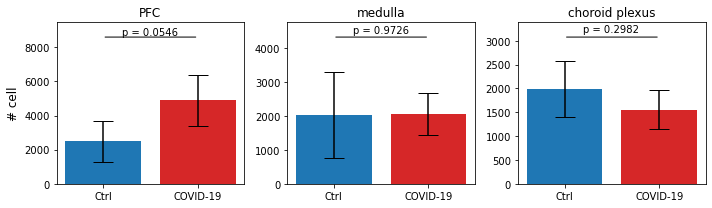

In [10]:
from scipy.stats import ttest_ind

fig, axes = plt.subplots(1, 3, figsize = (10, 3), sharex = True)
#id2subject = sorted(set(df_meta.subject_id))

for i, t in enumerate(set(df_meta.tissue)):
    meta = df_meta[df_meta.tissue == t]
    qc = df_qc[0][df_meta.tissue == t]
      
    y_cell = meta.groupby('subject_id').count().loc[id2subject].values[:, 0]
    y_gene = qc.groupby(by = meta.subject_id).median().loc[id2subject].values[:, 0]
    y = y_cell

    plt.sca(axes[i])
    means = [np.mean(y[:4]), np.mean(y[4:])]
    stds = [np.std(y[:4]), np.std(y[4:])]
    #plt.errorbar([1, 2], means, stds)
    plt.bar([1, 2], means, yerr=stds, color = ['tab:blue', 'tab:red'], capsize=10)
    _, p = ttest_ind(y[:4], y[4:])
    
    ymax = max(y) * 1.1
    
    plt.ylim([0, ymax * 1.1])
    plt.annotate('', xy=(1, ymax),xytext=(2, ymax),                     #draws an arrow from one set of coordinates to the other
            arrowprops=dict(arrowstyle='-',facecolor='red'),   #sets style of arrow and colour
            annotation_clip=False)                               #This enables the arrow to be outside of the plot

    plt.text(1.2, ymax + 100, 'p = %.4f' % p)
    plt.xticks([1, 2], ['Ctrl', 'COVID-19'])
    
    if t == 'choroidplexus':
        plt.title('choroid plexus')
    else:
        plt.title(t)
    if i == 0:
        plt.ylabel('# cell', fontsize = 12)
plt.tight_layout()
plt.savefig('figs/qc_cell_count_vs_disease.pdf')
plt.savefig('figs/png/qc_cell_count_vs_disease.png', dpi=600)
plt.show()